In [1]:
!git clone https://github.com/sabiomito/uffgpu2019.git
%cd uffgpu2019
!git checkout master

%cd PROJETO
!mkdir animatedFolder

Cloning into 'uffgpu2019'...
remote: Enumerating objects: 312, done.
remote: Counting objects: 100% (312/312), done.
remote: Compressing objects: 100% (222/222), done.
remote: Total 312 (delta 161), reused 238 (delta 87), pack-reused 0
Receiving objects: 100% (312/312), 33.94 MiB | 21.76 MiB/s, done.
Resolving deltas: 100% (161/161), done.
/content/uffgpu2019
Already on 'master'
Your branch is up to date with 'origin/master'.
/content/uffgpu2019/PROJETO


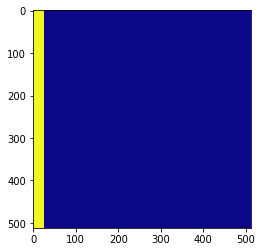

In [54]:
def fazEntrada(tam,show):
  from random import randint
  from random import seed
  arquivo = open('entrada.txt', 'w')
  data = []
  for i in range(tam):
    dt = []
    for j in range(tam):
      if(j<tam/20):#(j>tam/2-5 and j<tam/2+4):# and i>128 and i<1024-128):# or (j>120 and j<130 and i >120 and i<130)):
        dt.append(3)
      else:
        dt.append(0)
      
    data.append(dt)


  #seed(30)
  #for i in range(tam):
  #  data[randint(0,tam-1)][randint(0,tam-1)] = 3


  for i in range(tam):
    txt = ""
    for j in range(tam):
      txt+=" "+str(data[i][j])
    arquivo.write(txt+"\n")
  arquivo.close()


  from matplotlib import pyplot as plt
  arquivo = open('entrada.txt', 'r')
  img = []
  for linha in arquivo:
      img.append(list(map(int,linha.split())))
  #print(img)
  arquivo.close()
  plt.imshow(img,cmap='plasma')
  if(show):
    plt.show()
fazEntrada(512,True)

In [0]:
import os
def compile(steps):
  !nvcc 2DstencilGPUSharedMemoryKarma.cu  -o go -D MODEL_WIDTH=1024
  string = "./go "+str(steps)
  print(string)
  os.system(string)
  #!./go steps

def compile0(size,steps):
  string = "nvcc 2DstencilGPUSharedMemoryKarma.cu  -o go -D MODEL_WIDTH="+str(size)
  print(string)
  os.system(string)
  string = "./go "+str(steps)
  print(string)
  os.system(string)
  #!./go steps


def compile2(size,order,steps):
  !nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlocking.cu  -o go
  string = "./go "+str(size)+" "+str(order)+" "+str(steps)
  print(string)
  os.system(string)
  #!./go steps

def compile3(size,order,steps):
  !nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=1024
  string = "./go "+str(size)+" "+str(order)+" "+str(steps)
  print(string)
  os.system(string)
  #!./go steps

def compile4(size,order,steps):
  string = "nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH="+str(size)
  print(string)
  os.system(string)
  string = "./go "+str(size)+" "+str(order)+" "+str(steps)
  print(string)
  os.system(string)
  #!./go steps


def show():
  arquivo = open('resultado.txt', 'r')
  img = []
  for linha in arquivo:
    img.append(list(map(float,linha.split())))
  arquivo.close()
  plt.imshow(img,cmap='plasma')
  plt.show()
  return img
  #for i in img:
  #  print(i)

from matplotlib import pyplot as plt
def saveToGif(t):
  arquivo = open('resultado.txt', 'r')
  img = []
  for linha in arquivo:
    img.append(list(map(float,linha.split())))
  arquivo.close()
  plt.imshow(img,cmap='plasma')
  name = "animatedFolder/animated"+str(t)
  plt.savefig(name)
  return(name+".png")
  #plt.show()

In [0]:
!nvcc 3DstencilCPU.cpp  -o go
!./go

In [0]:
!nvcc 3DstencilGPUGlobalMemory.cu  -o go
!./go 512 512 160 2

^C


In [0]:
#0.59546
!nvcc 3DstencilGPUSharedMemory.cu -o go
!./go 32 32 4

X 32 || Y 32 
BX 32 || BY 32
GX 1 || GY 1
Z 4 
[4096,0.63600,-94503384.15656],


In [0]:
!nvcc 3DstencilGPUGlobalMemoryCpuBorder.cu  -o go
!./go 4 4 2 4

In [0]:
!nvcc 3DstencilGPUMiciquevicious.cu  -o go
!./go 16 16 80 4

3DstencilGPUMiciquevicious.cu(93): warning: variable "times" was set but never used

3DstencilGPUMiciquevicious.cu(106): warning: variable "k" was set but never used

X 16 || Y 16 
BX 16 || BY 16
GX 1 || GY 1
Z 80 
[20480,0.11018,-94788047.29772],


In [0]:
!nvcc 3DstencilGPUGlobalMemoryCube.cu  -o go
!./go 16 16 16 4

In [0]:
!gcc 2DstencilCPU.cpp -o go
!./go 64 2 8



 coefs 
 1.000000 0.500000
 coefs 


In [0]:
!nvcc 2DstencilGPUGlobalMemory.cu  -o go
!./go 64 8 1


 coefs 
 1.000000 0.800000 0.600000 0.400000 0.200000
 coefs 
X 64 || Y 64 
BX 32 || BY 32 
[4096,0.03622],


In [0]:
!nvcc 2DstencilGPUGlobalMemoryCPUBorder.cu  -o go
!./go 4096 8 4


 coefs 
 1.000000 0.800000 0.600000 0.400000 0.200000
 coefs 
X 64 || Y 64 
BX 32 || BY 32 
[4096,0.21747],


In [0]:
!nvcc 2DstencilGPUGlobalMemoryBlankBorder.cu  -o go
!./go 64 2 30


 coefs 
 1.000000 0.500000
 coefs 
X 64 || Y 64 
BX 32 || BY 32 
[4096,0.29696],


In [0]:
!nvcc 2DstencilGPUSharedMemoryBlankBorder.cu  -o go
!./go 4096 16 32


 coefs 
 1.000000 0.888889 0.777778 0.666667 0.555556 0.444444 0.333333 0.222222 0.111111
 coefs 
X 4096 || Y 4096 
BX 32 || BY 32 
[16777216,208.23654],


In [0]:
!nvcc 2DstencilGPUSharedMemoryBlankBorderTimeSpaceSharing.cu  -o go
!./go 4096 2 3 32 32

2DstencilGPUSharedMemoryBlankBorderTimeSpaceSharing.cu(97): warning: variable "sharedTam" was declared but never referenced


 coefs 
 1.000000 0.500000
 coefs 
X 4096 || Y 4096 
BX 32 || BY 32 
[16777216,6.02253],


In [0]:
!nvcc 2DstencilGPUGlobalMemoryBlankBorder.cu -o runGlobal && nvcc 2DstencilGPUSharedMemoryBlankBorder.cu -o runShared && nvcc 2DstencilGPUSharedMemoryBlankBorderTimeSpaceSharing.cu -o runTime && ./runGlobal 4096 4 1 > Global_4096_4.txt && echo 4096 4 1 && ./runGlobal 4096 4 2 >> Global_4096_4.txt && echo 4096 4 2 && ./runGlobal 4096 4 3 >> Global_4096_4.txt && echo 4096 4 3 && ./runGlobal 4096 4 4 >> Global_4096_4.txt && echo 4096 4 4 && ./runGlobal 4096 4 5 >> Global_4096_4.txt && echo 4096 4 5 && ./runGlobal 4096 4 6 >> Global_4096_4.txt && echo 4096 4 6 && ./runGlobal 4096 4 7 >> Global_4096_4.txt && echo 4096 4 7 && ./runGlobal 4096 4 8 >> Global_4096_4.txt && echo 4096 4 8 && ./runGlobal 4096 4 9 >> Global_4096_4.txt && echo 4096 4 9 && ./runGlobal 4096 4 10 >> Global_4096_4.txt && echo 4096 4 1 && ./runGlobal 4096 4 11 >> Global_4096_4.txt && echo 4096 4 1 && ./runShared 4096 4 1 > Shared_4096_4.txt && echo 4096 4 1 && ./runShared 4096 4 2 >> Shared_4096_4.txt && echo 4096 4 2 && ./runShared 4096 4 3 >> Shared_4096_4.txt && echo 4096 4 3 && ./runShared 4096 4 4 >> Shared_4096_4.txt && echo 4096 4 4 && ./runShared 4096 4 5 >> Shared_4096_4.txt && echo 4096 4 5 && ./runShared 4096 4 6 >> Shared_4096_4.txt && echo 4096 4 6 && ./runShared 4096 4 7 >> Shared_4096_4.txt && echo 4096 4 7 && ./runShared 4096 4 8 >> Shared_4096_4.txt && echo 4096 4 8 && ./runShared 4096 4 9 >> Shared_4096_4.txt && echo 4096 4 9 && ./runShared 4096 4 10 >> Shared_4096_4.txt && echo 4096 4 1 && ./runShared 4096 4 11 >> Shared_4096_4.txt && echo 4096 4 1 && ./runTime 4096 4 1 > Time_4096_4.txt && echo 4096 4 1 && ./runTime 4096 4 2 >> Time_4096_4.txt && echo 4096 4 2 && ./runTime 4096 4 3 >> Time_4096_4.txt && echo 4096 4 3 && ./runTime 4096 4 4 >> Time_4096_4.txt && echo 4096 4 4 && ./runTime 4096 4 5 >> Time_4096_4.txt && echo 4096 4 5 && ./runTime 4096 4 6 >> Time_4096_4.txt && echo 4096 4 6 && ./runTime 4096 4 7 >> Time_4096_4.txt && echo 4096 4 7 && ./runTime 4096 4 8 >> Time_4096_4.txt && echo 4096 4 8 && ./runTime 4096 4 9 >> Time_4096_4.txt && echo 4096 4 9 && ./runTime 4096 4 10 >> Time_4096_4.txt && echo 4096 4 1 && ./runTime 4096 4 11 >> Time_4096_4.txt && echo 4096 4 1  

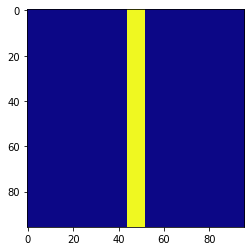

In [0]:
from matplotlib import pyplot as plt
arquivo = open('resultado.txt', 'r')
img = []
for linha in arquivo:
  img.append(list(map(float,linha.split())))
arquivo.close()
plt.imshow(img,cmap='plasma')
plt.show()

./go 96 1 1
./go 96 1 201
./go 96 1 401
./go 96 1 601
./go 96 1 801
./go 96 1 1001
./go 96 1 1201
./go 96 1 1401
./go 96 1 1601
./go 96 1 1801
./go 96 1 2001
./go 96 1 2201
./go 96 1 2401
./go 96 1 2601
./go 96 1 2801
./go 96 1 3001
./go 96 1 3201
./go 96 1 3401
./go 96 1 3601
./go 96 1 3801
./go 96 1 4001
./go 96 1 4201
./go 96 1 4401
./go 96 1 4601
./go 96 1 4801
./go 96 1 5001
./go 96 1 5201
./go 96 1 5401
./go 96 1 5601
./go 96 1 5801
./go 96 1 6001
./go 96 1 6201
./go 96 1 6401
./go 96 1 6601
./go 96 1 6801
./go 96 1 7001
./go 96 1 7201
./go 96 1 7401
./go 96 1 7601
./go 96 1 7801
./go 96 1 8001
./go 96 1 8201
./go 96 1 8401
./go 96 1 8601
./go 96 1 8801
./go 96 1 9001
./go 96 1 9201
./go 96 1 9401
./go 96 1 9601
./go 96 1 9801
./go 96 1 10001
./go 96 1 10201
./go 96 1 10401
./go 96 1 10601
./go 96 1 10801
./go 96 1 11001
./go 96 1 11201
./go 96 1 11401
./go 96 1 11601
./go 96 1 11801
./go 96 1 12001
./go 96 1 12201
./go 96 1 12401
./go 96 1 12601
./go 96 1 12801
./go 96 1 13001
.

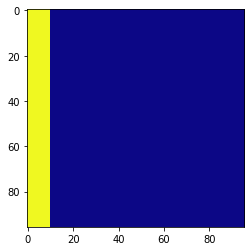

In [0]:

import imageio
'''
filenames = []
for i in range(1,12000,200):
  compile(i)
  filenames.append(saveToGif(i))
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('animatedFolder/animated0.gif', images)
max 21 times
'''

for times in range(1,21,1):
  filenames = []
  for i in range(1,19000,200):
    compile2(96,times,i)
    filenames.append(saveToGif(i))
  images = []
  for filename in filenames:      
      images.append(imageio.imread(filename))
  imageio.mimsave('animatedFolder/animated0'+str(times)+'.gif', images)

In [63]:
!nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=256
! ./go 256 15 4000
#img = show()
'''
import imageio
for size in range(64,800,32):
  fazEntrada(size,False)
  filenames = []
  for i in range(1,19000,400):
    compile4(size,15,i)
    filenames.append(saveToGif(i))
  images = []
  for filename in filenames:      
      images.append(imageio.imread(filename))
  imageio.mimsave('animatedFolder/animated0'+str(size)+'.gif', images)


for i in range(32,800,32):
  print("Entrada ")
  fazEntrada(i,False)
  compile4(i,15,6000)
'''

'\nimport imageio\nfor size in range(64,800,32):\n  fazEntrada(size,False)\n  filenames = []\n  for i in range(1,19000,400):\n    compile4(size,15,i)\n    filenames.append(saveToGif(i))\n  images = []\n  for filename in filenames:      \n      images.append(imageio.imread(filename))\n  imageio.mimsave(\'animatedFolder/animated0\'+str(size)+\'.gif\', images)\n\n\nfor i in range(32,800,32):\n  print("Entrada ")\n  fazEntrada(i,False)\n  compile4(i,15,6000)\n'

nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=64
./go 64 5 19000
nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=96
./go 96 5 19000
nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=128
./go 128 5 19000
nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=160
./go 160 5 19000
nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=192
./go 192 5 19000
nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=224
./go 224 5 19000
nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=256
./go 256 5 19000
nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=288
./go 288 5 19000
nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=320
./go 320 5 19000
nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockin

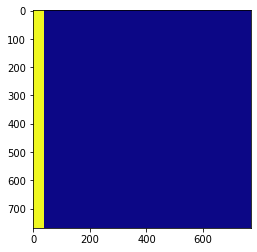

In [66]:
#!nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=256
#! ./go 256 15 4000
#img = show()
import imageio
for times in range(5,6,1):
  for size in range(64,800,32):
    fazEntrada(size,False)
    #compile0(size,19000)
    compile4(size,times,19000)


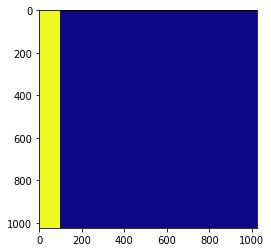

./go 12000


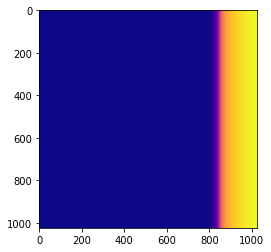

./go 1024 1 12000


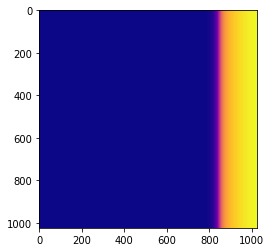

./go 1024 2 12000


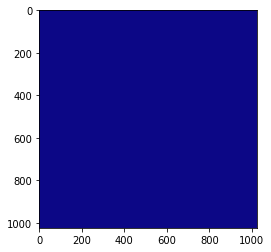

./go 1024 3 12000


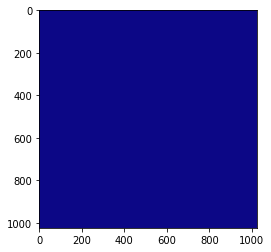

./go 1024 4 12000


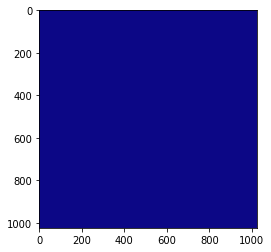

./go 1024 5 12000


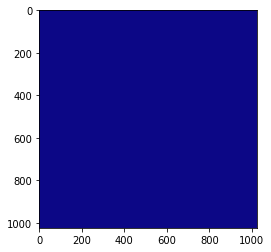

./go 1024 6 12000


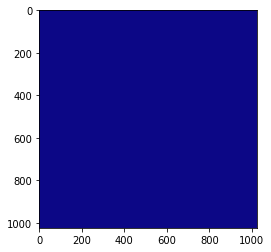

KeyboardInterrupt: ignored

In [22]:
from matplotlib import pyplot as plt
arquivo = open('entrada.txt', 'r')
img = []
for linha in arquivo:
    img.append(list(map(int,linha.split())))
#print(img)
arquivo.close()
plt.imshow(img,cmap='plasma')
plt.show()

#for i in range(1,30,1):
compile(12000)
img = show()
for i in range(1,21,1):
  compile3(1024,i,12000)
  img = show()

In [0]:
!git checkout -- .

In [0]:
for i in img:
  print(i)

[35.0, 69.0, 103.0, 137.0, 171.0, 205.0, 239.0, 273.0, 307.0, 341.0, 375.0, 409.0, 443.0, 477.0, 511.0, 545.0, 579.0, 613.0, 647.0, 681.0, 715.0, 749.0, 783.0, 817.0, 851.0, 885.0, 919.0, 953.0, 987.0, 1021.0, 1055.0, 1089.0, 35.0, 69.0, 103.0, 137.0, 171.0, 205.0, 239.0, 273.0, 307.0, 341.0, 375.0, 409.0, 443.0, 477.0, 511.0, 545.0, 579.0, 613.0, 647.0, 681.0, 715.0, 749.0, 783.0, 817.0, 851.0, 885.0, 919.0, 953.0, 987.0, 1021.0, 1055.0, 1089.0, 35.0, 69.0, 103.0, 137.0, 171.0, 205.0, 239.0, 273.0, 307.0, 341.0, 375.0, 409.0, 443.0, 477.0, 511.0, 545.0, 579.0, 613.0, 647.0, 681.0, 715.0, 749.0, 783.0, 817.0, 851.0, 885.0, 919.0, 953.0, 987.0, 1021.0, 1055.0, 1089.0]
[36.0, 70.0, 104.0, 138.0, 172.0, 206.0, 240.0, 274.0, 308.0, 342.0, 376.0, 410.0, 444.0, 478.0, 512.0, 546.0, 580.0, 614.0, 648.0, 682.0, 716.0, 750.0, 784.0, 818.0, 852.0, 886.0, 920.0, 954.0, 988.0, 1022.0, 1056.0, 1090.0, 36.0, 70.0, 104.0, 138.0, 172.0, 206.0, 240.0, 274.0, 308.0, 342.0, 376.0, 410.0, 444.0, 478.0, 51

In [0]:
!rm -R uffgpu2019/

In [0]:
!nvidia-smi

Thu Dec  5 03:20:24 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!nvcc 2DstencilGPUSharedMemoryBlankBorderTimeSpaceSharingOpencvKarma.cu -o go `pkg-config --cflags --libs opencv` -w
!./go 32 2 1


 coefs 
 1.000000 0.500000
 coefs 
Unable to init server: Could not connect: Connection refused

(orig:348): Gtk-WARNING **: 00:36:16.384: cannot open display: 
